# Microsoft Movie Analysis

_Author: Valentina Valdez_

![picture of motion picture camera](Images/pexels-donald-tong-66134.jpg)

## 1.0 Business Understanding

### 1.1 Company Vision & High Level Goals

Microsoft's decision to venture into the movie industry marks an exciting strategic shift. By telling compelling stories through film, Microsoft can connect with audiences on an emotional level and establish a stronger presence in popular culture, leading to increased brand awareness. 

Other tech companies, such as Apple and Amazon, have succesfully transitioned into the entertainment industry. By leveraging its extensive technological expertise, vast resources, and global reach, Microsoft can produce high-quality movies that will enhance its brand image and increase its cultural influence.

This research seeks to use the available data to gain valuable insights into trends and consumption patterns, enabling the company to create tailored content that resonates with viewers and maximizes box office success. Within this notebook, I will explore what types of films Microsoft should make to maximize profitability and create positive brand exposure by producing critically acclaimed films. 

### 1.2 Film Industry Background

The period that this analysis will focus on starts from the New Hollywood Era. The New Hollywood era, spanning the late 1960s to the 1970s, was marked by auteur-driven filmmaking. High recognizable directors like Francis Ford Coppola, Martin Scorsese, and Steven Spielberg emerged during this time period and are still relevant today. The era produced groundbreaking films like "The Godfather," "Taxi Driver," and "Jaws," which not only achieved critical acclaim but also achieved significant commercial success.

In the 1980s and 1990s, the blockbuster era took hold, with studios increasingly focusing on  films designed to attract large audiences and generate substantial profits. Directors like James Cameron and Steven Spielberg emerged and became synonymous with blockbuster filmmaking. "Titanic", which was directed by James Cameron, became the first billion dollar movie. It also won multiple awards, including an Oscar for Best Picture. 

In the 21st century, franchises, established intellectial properties (IPs), and cinematic universes are prevalent. Recognizable IPs such as Marvel and Star Wars series domanite the box office, attracting massive audiences and generating billions of dollars in revenue. Other IPs, such as Lego, Barbie, and Nintendo, have also plunged into filmmaking and have seen great success. These blockbusters often combine action, visual effects, and interconnected storytelling to create immersive cinematic experiences. However, strong independent voices in non-franchise cinema exist, with the likes of filmmakers like Quentin Tarantino and Wes Anderson. Prestige film awards, such as the Academy Awards, the Golden Globes, and the Cannes Film Festival, are also highly regarded in the industry and in popular culture.  


### 1.3 Research Goals

Given the above goals and industry background, this analysis will focus on the following topics:
- Limit analysis to films released between 1969 and 2019.
- Investigate the types of films that produce high ROIs. 
- Find directors with experience creating either high ROI, high prestige films, or both. 

Let's dive in!

## 2.0 Data Understanding

This analysis uses a variety of trusted data sources. The datasets will be used to narrow down how Microsoft should  invest in its filmaking efforts. The sources are as follows:

- **IMDB:** Launched in 1990 - and owned by Amazon since 1998 - IMDB is one of the most popular and recognizable databases. This database houses a large amount of information such as directors, writers, genres, and release date.  
- **The Numbers:** This database was started in 1997, and is now the largest freely available database of movie business information. The available data contains information about movie titles, production budgets, and gross revenue data. 
- **The Academy Awards**: This data was created by scraping the <a href="https://awardsdatabase.oscars.org/">academy database</a> for a Kaggle competition. The Academy Awards is considered the most prestigious filmaking award in America, and this data will provide valuable insights in identifying individuals capable of making prestige films. This dataset contains information on Academy Award nominees and winners between the years 1927 and 2023. Access the data <a href="https://www.kaggle.com/datasets/unanimad/the-oscar-award">here</a> .  


This analysis is limited by the information in these datasets, and may not fully encompass the full scope of the filmaking industry. However, the data is current enough that this analysis can still provide valuable insight and guide Microsoft on their next steps.


The first step in this analysis is to understand the data and how we can transform it to gleam insights. First, I am importing the necessary libraries to read the data and perform the necessary analysis. I will review the data sources one by one to determine what needs to be done before we can perform analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime

%matplotlib inline

# changing pandas formatting to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

### 2.1 IMDB

Let's examine IMDB's database first, which is the most extensive of the three. I will need information on movies titles, their genres, and the directors per film. 

In [2]:
#Connect to database

conn = sqlite3.connect("Data/im.db")

#Review tables
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
#Query tables 
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [4]:
#Review data structure
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Based on these initial queries, I will need to connect the additional tables to add the directors per film.

### 2.2 The Numbers

For this dataset, the goal is to calculate the Return on Investment per film. Additionally, films will be categorized by budget so that the budget can be discribed as low, mid, or high. Eventually, I can tie this information to the IMDB table and identify which films and directors have produced high ROIs. 

In [5]:
#Import data
numbers_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')

#Preview table
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#Review data structure
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The initial assessment is that this data will need to be converted in the following ways:

- The budget and gross data columns need to be converted to integers. 
- The release_date column needs to be coverted to datetime object.
- There are no null values, but I will need to further examine to make sure that the values are valid .

### 2.3 The Academy Awards

This dataset will be critical in providing information on which films and directors have been critically accalimed. 

In [7]:
#Import Data
oscars_df = pd.read_csv('Data/the_oscar_award.csv')

#Preview Data
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [8]:
#Review data structure 
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


Based on this preliminary review, I will need to do the following:
- Make sure that the name column belongs to only people.
- Find out the missing data from films
- Filter by relevant categories - in this analysis, we will only look at films that won were either nominated or won  in recognizable categories like Best Picture, etc. 

## 3.0 Data Preparation

Now that we have a good understanding of our data, the next step is to clean the datasets and engineer some features.

### 3.1 IMDB

#### 3.1.1 Movie Genres

For the IMDB dataset, I will need the film name, release year, director, and genre. I will also filter films made prior to 1969 and any foreign language films. 

In [9]:
#Query relevant tables and preview data

movies_data = pd.read_sql(
"""
SELECT primary_title AS movie, 
       start_year, 
       genres,
       primary_name AS director,
       death_year
  FROM movie_basics
      JOIN directors 
           USING(movie_id)
      JOIN persons
           USING(person_id)
  WHERE start_year BETWEEN 1969 AND 2019
    AND movie_id IN (SELECT movie_id
                     FROM movie_akas
                     WHERE language = 'en')
;""", conn)

#Preview results
movies_data.head()

,movie,start_year,genres,director,death_year
0,One Day Before the Rainy Season,2019,"Biography,Drama",Mani Kaul,2011.00
1,Sabse Bada Sukh,2018,"Comedy,Drama",Hrishikesh Mukherjee,2006.00
2,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,2011.00
3,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,2011.00
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento,nan


In [10]:
#Review DataFrame structure
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43337 entries, 0 to 43336
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       43337 non-null  object 
 1   start_year  43337 non-null  int64  
 2   genres      42802 non-null  object 
 3   director    43337 non-null  object 
 4   death_year  498 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
#Check for duplicates
duplicates = movies_data[movies_data.duplicated()]
print(len(duplicates))
duplicates.head()

22016


,movie,start_year,genres,director,death_year
3,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,2011.00
5,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento,nan
8,Children of the Green Dragon,2010,Drama,Bence Miklauzic,nan
9,Children of the Green Dragon,2010,Drama,Bence Miklauzic,nan
11,The Tragedy of Man,2011,"Animation,Drama,History",Marcell Jankovics,nan


In [12]:
# Remove Duplicates
movies_data.drop_duplicates(inplace=True)

#Check number of records
print(len(movies_data))

#Review results
movies_data.head()

21321


,movie,start_year,genres,director,death_year
0,One Day Before the Rainy Season,2019,"Biography,Drama",Mani Kaul,2011.00
1,Sabse Bada Sukh,2018,"Comedy,Drama",Hrishikesh Mukherjee,2006.00
2,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,2011.00
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento,nan
6,So Much for Justice!,2010,History,Miklós Jancsó,2014.00


In [13]:
#Check for extraneous values
for col in movies_data.columns:
    print(col, '\n', movies_data[col].value_counts(normalize=True).head(), '\n')

movie 
 ABCs of Death 2                     0.00
Hongmao and Lantu: Phoenix Rising   0.00
Bridges of Sarajevo                 0.00
Movie 43                            0.00
Wonderland                          0.00
Name: movie, dtype: float64 

start_year 
 2014   0.11
2015   0.11
2013   0.11
2012   0.11
2016   0.11
Name: start_year, dtype: float64 

genres 
 Drama           0.22
Documentary     0.14
Comedy          0.06
Comedy,Drama    0.04
Drama,Romance   0.03
Name: genres, dtype: float64 

director 
 Jing Wong         0.00
Takashi Miike     0.00
Koichi Sakamoto   0.00
Poj Arnon         0.00
Herman Yau        0.00
Name: director, dtype: float64 

death_year 
 2016.00   0.17
2018.00   0.15
2015.00   0.14
2014.00   0.11
2013.00   0.09
Name: death_year, dtype: float64 



In [14]:
#Change Null values in 'death_year'
movies_data['death_year'] = movies_data['death_year'].fillna(0)

#Print results from data cleaning
print(f" This table has {len(movies_data)} entries. \
Each entry represents a film, its release date, genres, and director.")

 This table has 21321 entries. Each entry represents a film, its release date, genres, and director.


### 3.2 The Numbers

Next step is to clean and create features for the numbers dataset. From here, we want to find net profits and ROI. In addition to that, each film will be categorized by the size of their budget. 

In [15]:
#Check for duplicates
duplicates = numbers_df[numbers_df.duplicated()]
print(len(duplicates))

0


In [16]:
#Check for extraneous values
for col in numbers_df.columns:
    print(col, '\n', numbers_df[col].value_counts(normalize=True).head(), '\n\n')

id 
 4    0.01
53   0.01
61   0.01
65   0.01
69   0.01
Name: id, dtype: float64 


release_date 
 Dec 31, 2014   0.00
Dec 31, 2015   0.00
Dec 31, 2010   0.00
Dec 31, 2008   0.00
Dec 31, 2012   0.00
Name: release_date, dtype: float64 


movie 
 Halloween              0.00
King Kong              0.00
Home                   0.00
The Ten Commandments   0.00
The Signal             0.00
Name: movie, dtype: float64 


production_budget 
 $20,000,000   0.04
$10,000,000   0.04
$30,000,000   0.03
$15,000,000   0.03
$25,000,000   0.03
Name: production_budget, dtype: float64 


domestic_gross 
 $0            0.09
$8,000,000    0.00
$2,000,000    0.00
$7,000,000    0.00
$10,000,000   0.00
Name: domestic_gross, dtype: float64 


worldwide_gross 
 $0            0.06
$8,000,000    0.00
$2,000,000    0.00
$7,000,000    0.00
$11,000,000   0.00
Name: worldwide_gross, dtype: float64 




Unfortunately, this dataset contains some movies that do not have reported worldwide gross numbers. These will be dropped, but first, I will convert the columns to their appropiate data type. 

In [17]:
#Converting release_date column to datetime object
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])

#Filter results to movies released after 1969 - start of the New Hollywood Era 
numbers_df = numbers_df.loc[numbers_df['release_date'] >= '1969']


#Review results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
#Convert 'production_budget', 'domestic_gross', 'worldwide_gross' to integers

#Remove extra symbols from strings
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols:
    numbers_df[col] = numbers_df[col].str.replace('$','').str.replace(',','')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [19]:
#Convert columns to integers
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
numbers_df[cols] = numbers_df[cols].apply(pd.to_numeric, axis=1)

#Review results
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5632 non-null   int64         
 1   release_date       5632 non-null   datetime64[ns]
 2   movie              5632 non-null   object        
 3   production_budget  5632 non-null   int64         
 4   domestic_gross     5632 non-null   int64         
 5   worldwide_gross    5632 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 308.0+ KB


In [20]:
#Drop rows where worldwide_gross is 0. 
numbers_df = numbers_df.loc[numbers_df['worldwide_gross'] > 0]

Now that the data is clean, we can create the 'ROI' (Return on Investment) column with the following formula:

$$
ROI = \frac{Net Gross}{Production Budget} * 100
$$

In [48]:
#Add Net Profit Column
numbers_df['net_profit'] = (numbers_df['worldwide_gross'] - numbers_df['production_budget']).round(-3)

#Add ROI Column
numbers_df['ROI'] = (numbers_df['net_profit'] / numbers_df['production_budget'] * 100).round(-1)

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345000,550.00,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017,high


In [49]:
#Add new column "Year" as integer
numbers_df['release_year'] = pd.DatetimeIndex(numbers_df['release_date']).year

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345000,550.00,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017,high


In [50]:
#Budget ranking - first, define function

def budget_ranking(budget):
    if budget < 500000:
        return "low"
    elif budget > 50000000:
        return "high"
    else:
        return "mid"

In [51]:
#Create new column and apply function

numbers_df['budget_level'] = numbers_df['production_budget'].apply(budget_ranking)
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345000,550.00,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017,high


### 3.3 The Academy Awards

In [52]:
#Filtering for films made between 1969 and 2019

oscars_df = oscars_df.loc[(oscars_df['year_film'] >= 1969) & (oscars_df['year_film'] <= 2019)]
print("Min year: ", oscars_df['year_film'].min())
print("Max year: ", oscars_df['year_film'].max())


Min year:  1969
Max year:  2019


In [53]:
#Check for duplicates
duplicates = oscars_df[oscars_df.duplicated()]
print(len(duplicates))

0


In [54]:
#Review duplicates list
duplicates

,year_film,year_ceremony,ceremony,category,name,film,winner


In [55]:
#Check for extraneous values
for col in oscars_df.columns:
    print(col, '\n', oscars_df[col].value_counts(normalize=True).head(), '\n\n')

year_film 
 2010   0.02
2009   0.02
2013   0.02
2011   0.02
2012   0.02
Name: year_film, dtype: float64 


year_ceremony 
 2011   0.02
2010   0.02
2014   0.02
2012   0.02
2013   0.02
Name: year_ceremony, dtype: float64 


ceremony 
 83   0.02
82   0.02
86   0.02
84   0.02
85   0.02
Name: ceremony, dtype: float64 


category 
 BEST PICTURE                   0.19
ACTRESS IN A SUPPORTING ROLE   0.16
ACTOR IN A SUPPORTING ROLE     0.16
DIRECTING                      0.16
ACTRESS IN A LEADING ROLE      0.14
Name: category, dtype: float64 


name 
 Meryl Streep      0.01
Jack Nicholson    0.01
Al Pacino         0.01
Martin Scorsese   0.01
Woody Allen       0.01
Name: name, dtype: float64 


film 
 Network                   0.00
The Godfather Part II     0.00
American Hustle           0.00
Silver Linings Playbook   0.00
Coming Home               0.00
Name: film, dtype: float64 


winner 
 False   0.81
True    0.19
Name: winner, dtype: float64 




Some winners seem to be countries. This is an issue of who wins the award. For this analysis, we will only be looking at best actress, best actor, best director, and best picture awards. 

In [56]:
#Filter by award data types
oscars_df['category'].unique()

array(['ACTOR', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS',
       'ACTRESS IN A SUPPORTING ROLE', 'DIRECTING', 'BEST PICTURE',
       'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE'],
      dtype=object)

In [57]:
#Remove non-relevent awards
oscars_df = oscars_df[(oscars_df['category'].str.contains('act|directing|picture', case=False)) & \
                      (~oscars_df['category'].str.contains('writing|music|short', case=False))]
oscars_df['category'].unique()

array(['ACTOR', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS',
       'ACTRESS IN A SUPPORTING ROLE', 'DIRECTING', 'BEST PICTURE',
       'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE'],
      dtype=object)

In [58]:
#Recheck table
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
4668,1969,1970,42,ACTOR,Richard Burton,Anne of the Thousand Days,False
4669,1969,1970,42,ACTOR,Dustin Hoffman,Midnight Cowboy,False
4670,1969,1970,42,ACTOR,Peter O'Toole,"Goodbye, Mr. Chips",False
4671,1969,1970,42,ACTOR,Jon Voight,Midnight Cowboy,False
4672,1969,1970,42,ACTOR,John Wayne,True Grit,True


In [59]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 4668 to 10350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      1573 non-null   int64 
 1   year_ceremony  1573 non-null   int64 
 2   ceremony       1573 non-null   int64 
 3   category       1573 non-null   object
 4   name           1573 non-null   object
 5   film           1573 non-null   object
 6   winner         1573 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 87.6+ KB


In [60]:
#Separate best picture awards
picture_awards = oscars_df[(oscars_df['category'].str.contains('picture', case=False)) &
                           (~oscars_df['category'].str.contains('directing', case=False))]

picture_awards.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
4743,1969,1970,42,BEST PICTURE,"Hal B. Wallis, Producer",Anne of the Thousand Days,False
4744,1969,1970,42,BEST PICTURE,"John Foreman, Producer",Butch Cassidy and the Sundance Kid,False
4745,1969,1970,42,BEST PICTURE,"Ernest Lehman, Producer","Hello, Dolly!",False
4746,1969,1970,42,BEST PICTURE,"Jerome Hellman, Producer",Midnight Cowboy,True
4747,1969,1970,42,BEST PICTURE,"Jacques Perrin and Hamed Rachedi, Producers",Z,False


In [61]:
picture_awards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 4743 to 10350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      298 non-null    int64 
 1   year_ceremony  298 non-null    int64 
 2   ceremony       298 non-null    int64 
 3   category       298 non-null    object
 4   name           298 non-null    object
 5   film           298 non-null    object
 6   winner         298 non-null    bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 16.6+ KB


In [62]:
cols = ['category', 'name']
for col in cols:
    print(col, '\n', picture_awards[col].value_counts(normalize=True).head(10), '\n\n')

category 
 BEST PICTURE   1.00
Name: category, dtype: float64 


name 
 Lawrence Bender, Producer                          0.01
Steven Spielberg and Kathleen Kennedy, Producers   0.01
Irwin Winkler and Robert Chartoff, Producers       0.01
Stanley Kubrick, Producer                          0.01
David Puttnam, Producer                            0.01
Scott Rudin, Ethan Coen and Joel Coen, Producers   0.01
Finola Dwyer and Amanda Posey, Producers           0.01
Arnold Kopelson, Producer                          0.01
James Cameron and Jon Landau, Producers            0.01
A. Kitman Ho and Oliver Stone, Producers           0.01
Name: name, dtype: float64 




In [63]:
#Isolate directors
director_awards = oscars_df[(~oscars_df['category'].str.contains('picture', case=False)) &
                           (oscars_df['category'].str.contains('directing', case=False))]
cols = ['category', 'name']
for col in cols:
    print(col, '\n', director_awards[col].value_counts(normalize=True).head(10), '\n\n')

category 
 DIRECTING   1.00
Name: category, dtype: float64 


name 
 Martin Scorsese     0.04
Steven Spielberg    0.03
Woody Allen         0.03
Robert Altman       0.02
Clint Eastwood      0.02
Peter Weir          0.02
David O. Russell    0.01
Oliver Stone        0.01
Quentin Tarantino   0.01
Bob Fosse           0.01
Name: name, dtype: float64 




## 4.0 Exploratory Data Analysis

### 4.1 Does budget correlate to profits?

First, lets examine what correlation between ROI and worldwide gross profit.

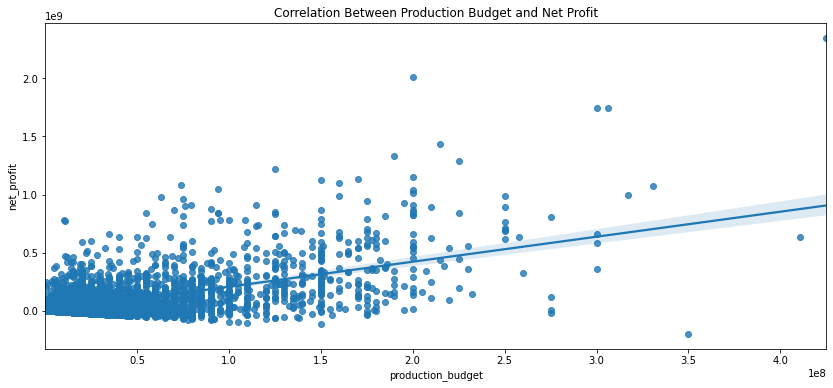

In [64]:
# Set the width and height
plt.figure(figsize=(14,6))

#Add title
plt.title('Correlation Between Production Budget and Net Profit')

#Create plot
sns.regplot(x=numbers_df['production_budget'],y=numbers_df['net_profit']);

From the graph above, we can observe a modest positive correlation betweem budget and net profit. 

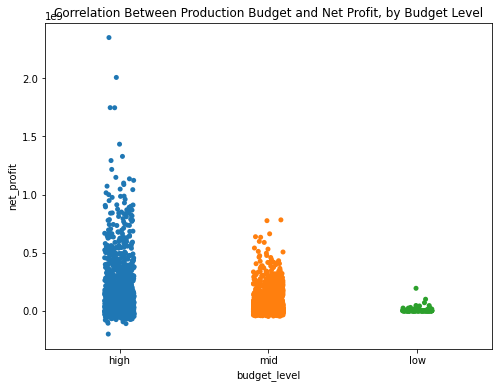

In [65]:
# Set the width and height
plt.figure(figsize=(8,6))

#Add title
plt.title('Correlation Between Production Budget and Net Profit, by Budget Level')

#Create plot
sns.stripplot(x=numbers_df['budget_level'],y=numbers_df['net_profit']);

While low budget movies can certainly be profitable, mid and high budgets have a better chance of earning much higher profits. 

## 4.2 Pick directors for every budget

We would like to properly staff these movies. Lets find current directors with good success records across different budget levels. 

In [66]:
movies_data

,movie,start_year,genres,director,death_year
0,One Day Before the Rainy Season,2019,"Biography,Drama",Mani Kaul,2011.00
1,Sabse Bada Sukh,2018,"Comedy,Drama",Hrishikesh Mukherjee,2006.00
2,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,2011.00
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento,0.00
6,So Much for Justice!,2010,History,Miklós Jancsó,2014.00
...,...,...,...,...,...
43329,Lupin the Third: Fujiko Mine's Lie,2019,"Adventure,Crime,Drama",Takeshi Koike,0.00
43331,Big Three Dragons,2019,Comedy,Nancy Chen,0.00
43332,Pengalila,2019,Drama,T.V. Chandran,0.00
43333,A Cherry Tale,2019,Documentary,Eva Mulvad,0.00


In [67]:
#Make list of current directors by dropping those with directors with 'death_year' values
current_directors = movies_data[movies_data['death_year'] < 1]

#Review data
current_directors

,movie,start_year,genres,director,death_year
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento,0.00
7,Children of the Green Dragon,2010,Drama,Bence Miklauzic,0.00
10,The Tragedy of Man,2011,"Animation,Drama,History",Marcell Jankovics,0.00
12,Gangavataran,2018,None,Madhukar Bavdekar,0.00
16,Return to Babylon,2013,"Biography,Comedy,Drama",Alex Monty Canawati,0.00
...,...,...,...,...,...
43329,Lupin the Third: Fujiko Mine's Lie,2019,"Adventure,Crime,Drama",Takeshi Koike,0.00
43331,Big Three Dragons,2019,Comedy,Nancy Chen,0.00
43332,Pengalila,2019,Drama,T.V. Chandran,0.00
43333,A Cherry Tale,2019,Documentary,Eva Mulvad,0.00


In [68]:
#Add financial data to table
directors_budget = current_directors.merge(numbers_df, how='inner', on='movie')

#Remove low budget films
directors_budget = directors_budget[~directors_budget['budget_level'].str.contains('low')]

#Review results
directors_budget.head()

,movie,start_year,genres,director,death_year,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,Tangled,2010,"Adventure,Animation,Comedy",Byron Howard,0.00,15,2010-11-24,260000000,200821936,586477240,326477000,130.00,2010,high
1,Tangled,2010,"Adventure,Animation,Comedy",Nathan Greno,0.00,15,2010-11-24,260000000,200821936,586477240,326477000,130.00,2010,high
2,Dinner for Schmucks,2010,Comedy,Jay Roach,0.00,51,2010-07-30,69000000,73026337,86796502,17797000,30.00,2010,high
3,Toy Story 3,2010,"Adventure,Animation,Comedy",Lee Unkrich,0.00,47,2010-06-18,200000000,415004880,1068879522,868880000,430.00,2010,high
4,Alita: Battle Angel,2019,"Action,Adventure,Sci-Fi",Robert Rodriguez,0.00,24,2019-02-14,170000000,85710210,402976036,232976000,140.00,2019,high


In [92]:
#Sort
directors_budget.sort_values('net_profit', ascending=False).head()

,movie,start_year,genres,director,death_year,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
373,Avatar,2011,Horror,Atsushi Wada,0.00,1,2009-12-18,425000000,760507625,2776345279,2351345000,550.00,2009,high
759,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Joe Russo,0.00,7,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,2018,high
758,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Anthony Russo,0.00,7,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,2018,high
646,Furious 7,2015,"Action,Crime,Thriller",James Wan,0.00,67,2015-04-03,190000000,353007020,1518722794,1328723000,700.00,2015,high
36,The Avengers,2012,"Action,Adventure,Sci-Fi",Joss Whedon,0.00,27,2012-05-04,225000000,623279547,1517935897,1292936000,570.00,2012,high


In [69]:
directors_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 926
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              915 non-null    object        
 1   start_year         915 non-null    int64         
 2   genres             910 non-null    object        
 3   director           915 non-null    object        
 4   death_year         915 non-null    float64       
 5   id                 915 non-null    int64         
 6   release_date       915 non-null    datetime64[ns]
 7   production_budget  915 non-null    int64         
 8   domestic_gross     915 non-null    int64         
 9   worldwide_gross    915 non-null    int64         
 10  net_profit         915 non-null    int64         
 11  ROI                915 non-null    float64       
 12  release_year       915 non-null    int64         
 13  budget_level       915 non-null    object        
dtypes: datetim

In [70]:
#Filter by directors with highest average net profit
top_directors = directors_budget.groupby('director')\
                        .mean().sort_values('net_profit', ascending=False).head(20)
top_directors

,start_year,death_year,id,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year
director,,,,,,,,,
Atsushi Wada,2011.00,0.00,1.00,425000000.00,760507625.00,2776345279.00,2351345000.00,550.00,2009.00
Anthony Russo,2017.00,0.00,12.00,275000000.00,543449915.50,1594101806.50,1319101500.00,470.00,2017.00
Joe Russo,2017.00,0.00,12.00,275000000.00,543449915.50,1594101806.50,1319101500.00,470.00,2017.00
Ryan Coogler,2018.00,0.00,42.00,200000000.00,700059566.00,1348258224.00,1148258000.00,570.00,2018.00
Chi-kin Kwok,2010.00,0.00,56.00,150000000.00,400738009.00,1272469910.00,1122470000.00,750.00,2013.00
Jennifer Lee,2013.00,0.00,56.00,150000000.00,400738009.00,1272469910.00,1122470000.00,750.00,2013.00
Chris Buck,2013.00,0.00,56.00,150000000.00,400738009.00,1272469910.00,1122470000.00,750.00,2013.00
Adam Green,2010.00,0.00,56.00,150000000.00,400738009.00,1272469910.00,1122470000.00,750.00,2013.00
Brad Bird,2018.00,0.00,44.00,200000000.00,608581744.00,1242520711.00,1042521000.00,520.00,2018.00


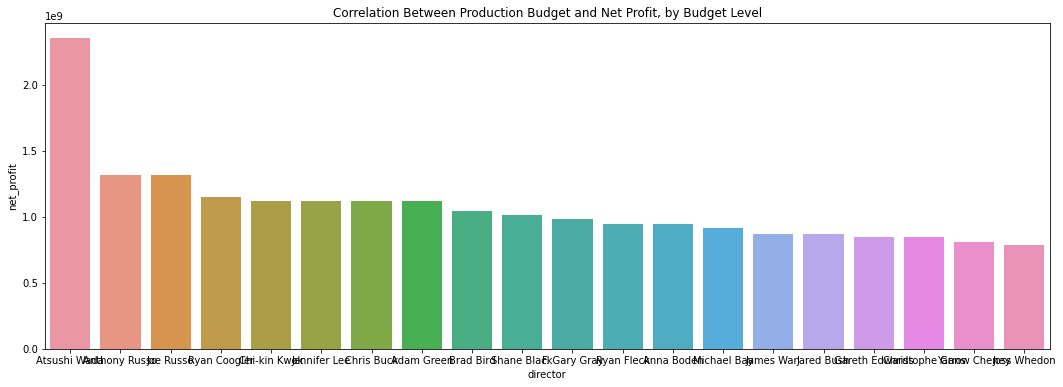

In [75]:
# Set the width and height
plt.figure(figsize=(18,6))

#Add title
plt.title('Correlation Between Production Budget and Net Profit, by Budget Level')

#Create plot
sns.barplot(x=top_directors.index, y=top_directors['net_profit']);

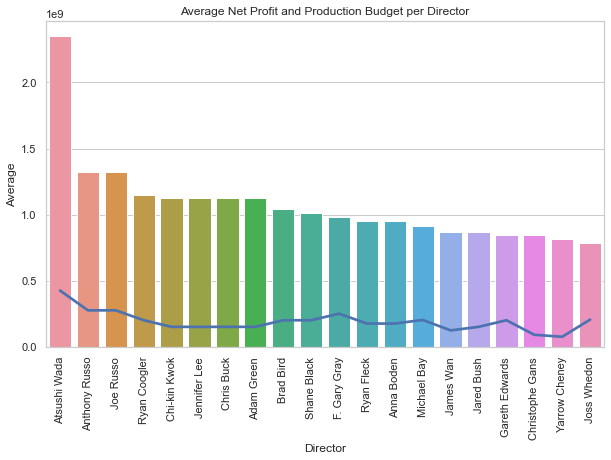

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=top_directors.index, y=top_directors['net_profit'], label='Average Net Profit')
sns.pointplot(x=top_directors.index, y=top_directors['production_budget'], label='Average ROI')

plt.xticks(rotation=90)
plt.xlabel("Director")
plt.ylabel("Average")
plt.title("Average Net Profit and Production Budget per Director");

Text(0.5, 1.0, 'Average Net Profit and Average ROI per Director')

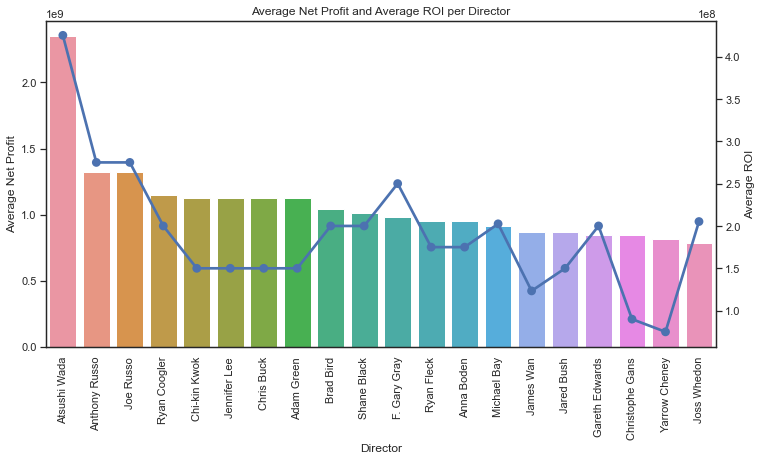

In [91]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(12, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_directors.index, y=top_directors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_directors.index, y=top_directors['production_budget'], label='Average ROI', ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax2.set_ylabel("Average ROI")
plt.title("Average Net Profit and Average ROI per Director")


## 4.3 Do Oscar nominated films ROI compare to non

## Recommendations

After this preliminary review, we recommend that Microsoft invests in the following strategies:



However, much research is still to be done. The biggest recommendation is to continue this research and explore the following: 